<a href="https://colab.research.google.com/github/Dare-Badejo-001/BioSteam-TEA-LCA/blob/main/BiosSteam_DistillationColumn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biosteam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.5/429.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 13.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.6/936.6 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 30.3 MB/s eta

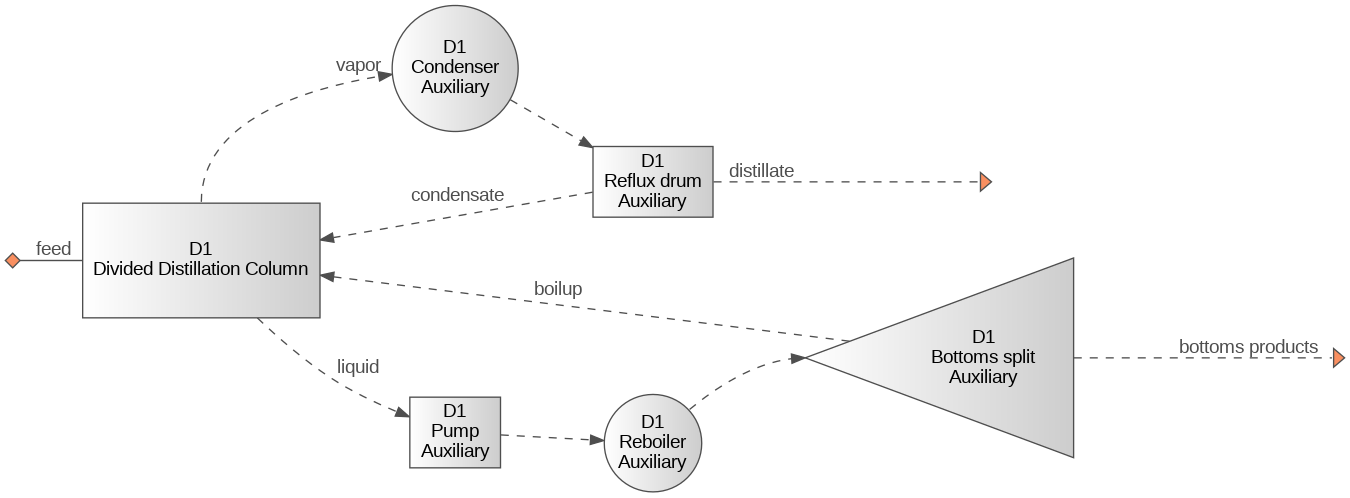

BinaryDistillation: D1
ins...
[0] feed  
    phase: 'l', T: 354.28 K, P: 101325 Pa
    flow (kmol/hr): Water    1.08e+03
                    Ethanol  586
outs...
[0] distillate  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] bottoms_products  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [ ]:
from biosteam import Stream , settings
import biosteam as bst
bst.nbtutorial()


# set the property package
settings.set_thermo(['Water', 'Ethanol'])

# create the feed at the bubble point
feed = Stream('feed', Water=1.08e+03, Ethanol=586)
bp = feed.bubble_point_at_P()
feed.T = bp.T

# create the distillation column and simulate it
# use the BinaryDistillation for 2-components
# for 3+ components use ShortcutColumn
# for rigorous use MESHDistillation

# Here we use the BinaryDistillation

D1 = bst.BinaryDistillation(
    'D1', ins=feed,
    outs=('distillate', 'bottoms_products'),
    LHK=('Ethanol', 'Water'),
    y_top=0.79, # Light key composition in the distillate
    x_bot= 0.001,  # Light key composition in the bottoms
    k =1.25,       # Ratio of actual reflux over minimum ratio
    is_divided='True' # weather rectifying and stripping section are divided
)

D1.diagram(format ='png')
D1.show()

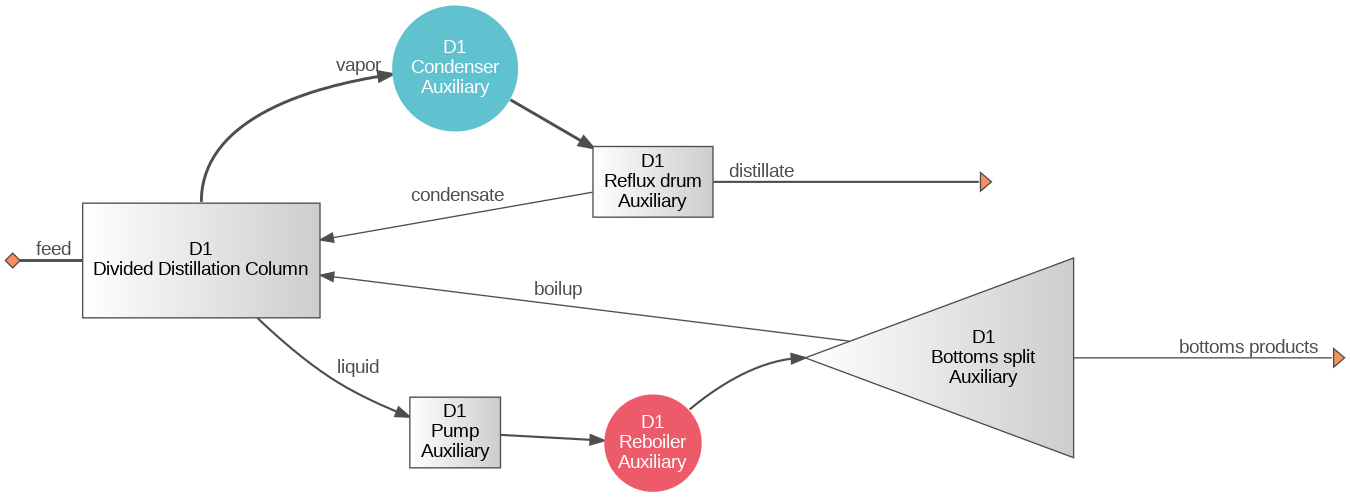

BinaryDistillation: D1
ins...
[0] feed  
    phase: 'l', T: 81.125 degC, P: 1 atm
    composition (%): Water    64.8
                     Ethanol  35.2
                     -------  1.67e+03 kmol/hr
outs...
[0] distillate  
    phase: 'g', T: 78.484 degC, P: 1 atm
    composition (%): Water    21
                     Ethanol  79
                     -------  741 kmol/hr
[1] bottoms_products  
    phase: 'l', T: 99.64 degC, P: 1 atm
    composition (%): Water    99.9
                     Ethanol  0.1
                     -------  925 kmol/hr


In [ ]:
# now we simulate the distillation column
D1.simulate()
D1.diagram(format='png')
D1.show(T='degC', P='atm', composition=True)

In [ ]:
D1.results()

Divided Distillation Column                                Units        D1
Electricity         Power                                     kW      2.49
                    Cost                                  USD/hr     0.195
Cooling water       Duty                                   kJ/hr -2.84e+07
                    Flow                                 kmol/hr  1.94e+04
                    Cost                                  USD/hr      9.45
Low pressure steam  Duty                                   kJ/hr  6.26e+07
                    Flow                                 kmol/hr  1.62e+03
                    Cost                                  USD/hr       385
Design              Theoretical feed stage                              26
                    Theoretical stages                                  31
                    Minimum reflux                         Ratio     0.771
                    Reflux                                 Ratio     0.964
                    Rectifier stages                                    45
                    Stripper stages                                      9
                    Rectifier height                          ft      78.9
                    Stripper height                           ft      25.8
                    Rectifier diameter                        ft      9.96
                    Stripper diameter                         ft      7.84
                    Rectifier wall thickness                  in     0.438
                    Stripper wall thickness                   in     0.375
                    Rectifier weight                          lb  4.18e+04
                    Stripper weight                           lb  1.22e+04
Purchase cost       Rectifier trays                          USD  9.02e+04
                    Stripper trays                           USD  1.95e+04
                    Rectifier tower                          USD  1.54e+05
                    Stripper platform and ladders            USD  4.86e+04
                    Stripper tower                           USD  6.97e+04
                    Rectifier platform and ladders           USD   1.7e+04
                    Condenser - Floating head                USD  6.58e+04
                    Reflux drum - Vertical pressure ...      USD  4.09e+04
                    Reflux drum - Platform and ladders       USD  1.07e+04
                    Pump - Pump                              USD  4.53e+03
                    Pump - Motor                             USD       441
                    Reboiler - Floating head                 USD  6.51e+04
Total purchase cost                                          USD  5.87e+05
Utility cost                                              USD/hr       395

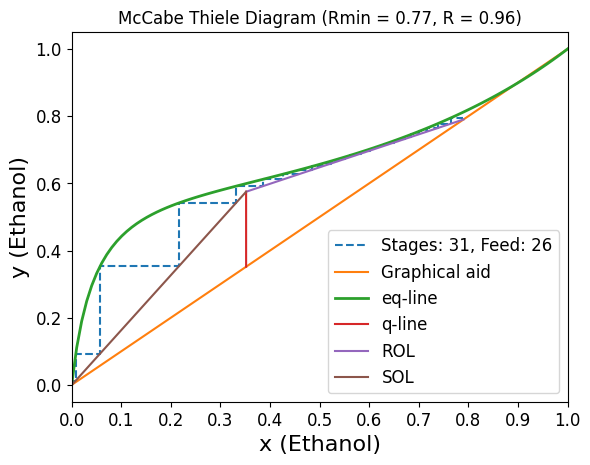

In [ ]:
from matplotlib import pyplot as plt
D1.plot_stages()
plt.show()